# Project: FIFA 2022 Player Stats Database.

# Introduction 

The FIFA Player Stats Database provides a comprehensive collection of player statistics from the FIFA gaming franchise. This dataset includes information about 16,437 players collected from The FIFA Database after merging and cleaning. It consists of 20 columns, capturing a mix of quantitative attributes (like ratings and physical stats) and categorical details (like nationality, position, and work rate). Key features include overall ratings, potential, wages, and skill moves — essential for evaluating player dynamics across clubs and positions.

Several Python libraries such as pandas, numpy, matplotlib, seaborn, and scikit-learn were utilized for analysis and modeling. By exploring this dataset, we gain insights into player performance trends, strengths, and common patterns among players across different roles.

# Analysis of the DataSet Questions that is analyized in the dataset

1- The Age distribution of players

2- The relationship between Ball Control and Skill Moves

3- Distributions of Skill Moves and Strength among players

4- Distribution of Best Overall Rating 

5- Ratio of preferred foot (Right vs. Left) among players

6- Distribution of work rates among players

7- Correlation between Skill Moves, ShortPassing, BallControl, and ShotPower

# Data Description of the data 


This section provides an overview of the cleaned and preprocessed FIFA player dataset, aiming to deliver valuable insights into player statistics. It helps users understand the refined structure, key attributes, and ready-to-analyze format of the data after performing essential data cleaning steps.

In [108]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer 

In [109]:
DATA = pd.read_csv(r'J:\Data science\plyer_data.csv', encoding='ISO-8859-1')

In [110]:
DATA.info()
print("Dimensions:", DATA.shape)
print("Null values:\n",DATA.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16437 entries, 0 to 16436
Data columns (total 29 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        16437 non-null  int64  
 1   Nationality               16437 non-null  object 
 2   Potential                 16437 non-null  int64  
 3   Club                      16437 non-null  object 
 4   Wage                      16437 non-null  object 
 5   Skill Moves               16437 non-null  int64  
 6   Position                  16437 non-null  object 
 7   Joined                    16437 non-null  object 
 8   Contract Valid Until      16350 non-null  object 
 9   Weight                    16437 non-null  object 
 10  ShortPassing              16437 non-null  int64  
 11  BallControl               16437 non-null  int64  
 12  ShotPower                 16437 non-null  int64  
 13  LongShots                 16437 non-null  int64  
 14  Positi

In [111]:
print("Dimensions of DATA: ", DATA.shape)
print("\nInformation about DATA: ")
print(DATA.info())
print("\nHead of DATA: \n", DATA.head())

Dimensions of DATA:  (16437, 29)

Information about DATA: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16437 entries, 0 to 16436
Data columns (total 29 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        16437 non-null  int64  
 1   Nationality               16437 non-null  object 
 2   Potential                 16437 non-null  int64  
 3   Club                      16437 non-null  object 
 4   Wage                      16437 non-null  object 
 5   Skill Moves               16437 non-null  int64  
 6   Position                  16437 non-null  object 
 7   Joined                    16437 non-null  object 
 8   Contract Valid Until      16350 non-null  object 
 9   Weight                    16437 non-null  object 
 10  ShortPassing              16437 non-null  int64  
 11  BallControl               16437 non-null  int64  
 12  ShotPower                 16437 non-null  int64  
 13  Lo

# Data Cleaning 

 Data cleaning is a crucial step in the data analysis process that involves identifying and correcting errors, inconsistencies, and missing values in the dataset. By ensuring the data is accurate, complete, and formatted correctly, we aim to improve the quality and reliability of our analysis results.Problems With the dataset:
 
 1-Remove unused Columns (Marking ,Loaned From ,DefensiveAwareness)
 
 2-Remove duplication rows
 
 3-Remove rows contains noisy data
 
 4-Check Null values and modify it with a value or fillna
 
 5-Modify the datatype of Joined column to the correct datatype (from string into date) and Jersey Number from integer to float 
 

 1-Remove unused Columns (ID , Name)

In [112]:
# DATA.drop(['ID', 'Name'], axis=1, inplace=True)

2-Remove duplication rows

In [113]:
duplicated_rows = DATA.duplicated().sum()
print("Number of duplicated rows before removing:", duplicated_rows)

DATA.drop_duplicates(keep='first', inplace=True)

print("Number of rows after removing duplicates:", DATA.shape[0])

Number of duplicated rows before removing: 0
Number of rows after removing duplicates: 16437


3-Remove rows contains noisy data

4-modify Null values

In [ ]:
DATA['Contract Valid Until'].fillna(2025, inplace=True)

DATA['Composure'].fillna(DATA['Composure'].mean(), inplace=True)

In [115]:
DATA['Contract Valid Until'] = DATA['Contract Valid Until'].fillna(2025)
DATA['Skill Moves'] = DATA['Skill Moves'].fillna(DATA['Skill Moves'].mean())
DATA['Composure'] = DATA['Composure'].fillna(DATA['Composure'].mean())

In [116]:
print("\nData after cleaning:")
print("Dimensions of DATA: ", DATA.shape)
print("Size of DATA:", DATA.size) 
print(DATA.info())
print("\nHead of DATA: \n", DATA.head()) 
print("\nRemaining missing values:\n", DATA.isnull().sum())


Data after cleaning:
Dimensions of DATA:  (16437, 29)
Size of DATA: 476673
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16437 entries, 0 to 16436
Data columns (total 29 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        16437 non-null  int64  
 1   Nationality               16437 non-null  object 
 2   Potential                 16437 non-null  int64  
 3   Club                      16437 non-null  object 
 4   Wage                      16437 non-null  object 
 5   Skill Moves               16437 non-null  int64  
 6   Position                  16437 non-null  object 
 7   Joined                    16437 non-null  object 
 8   Contract Valid Until      16437 non-null  object 
 9   Weight                    16437 non-null  object 
 10  ShortPassing              16437 non-null  int64  
 11  BallControl               16437 non-null  int64  
 12  ShotPower                 16437 non-null

# Exploratory Data Analysis

In [117]:
DATA.describe()

,ID,Potential,Skill Moves,ShortPassing,BallControl,ShotPower,LongShots,Positioning,Composure,Best Overall Rating,Age,International Reputation,Jersey Number,LongPassing,SprintSpeed,Strength,Penalties
count,16437.000000,16437.000000,16437.00000,16437.000000,16437.000000,16437.000000,16437.000000,16437.000000,16437.000000,16437.000000,16437.000000,16437.000000,16437.000000,16437.000000,16437.000000,16437.000000,16437.000000
mean,220777.388392,72.585873,2.47679,61.313683,61.389670,60.621950,49.965140,53.144491,60.978716,68.542131,25.681876,1.168036,20.573706,55.440105,65.788222,66.239338,50.580337
std,38068.607213,5.678132,0.78941,13.626383,15.633498,12.951927,19.050472,19.176633,11.290037,6.251513,5.043722,0.481710,17.773941,14.465243,14.740181,12.624465,15.721972
min,27.000000,46.000000,1.00000,8.000000,8.000000,12.000000,4.000000,3.000000,12.000000,44.000000,16.000000,1.000000,1.000000,9.000000,15.000000,19.000000,7.000000
25%,204095.000000,69.000000,2.00000,57.000000,58.000000,52.000000,37.000000,44.000000,55.000000,64.000000,22.000000,1.000000,8.000000,47.000000,59.000000,59.000000,41.000000
50%,229349.000000,72.000000,2.00000,64.000000,65.000000,62.000000,55.000000,58.000000,62.000000,68.000000,25.000000,1.000000,17.000000,58.000000,68.000000,68.000000,52.000000
75%,245371.000000,76.000000,3.00000,70.000000,71.000000,70.000000,65.000000,67.000000,69.000000,73.000000,29.000000,1.000000,27.000000,66.000000,76.000000,75.000000,62.000000
max,264704.000000,95.000000,5.00000,94.000000,96.000000,95.000000,94.000000,96.000000,96.000000,93.000000,54.000000,5.000000,99.000000,93.000000,97.000000,97.000000,96.000000


In [118]:
DATA.to_csv(r'J:\Data science\Cleaned_DATA.csv', index=False)

# Research Question 1: The Age distribution of players

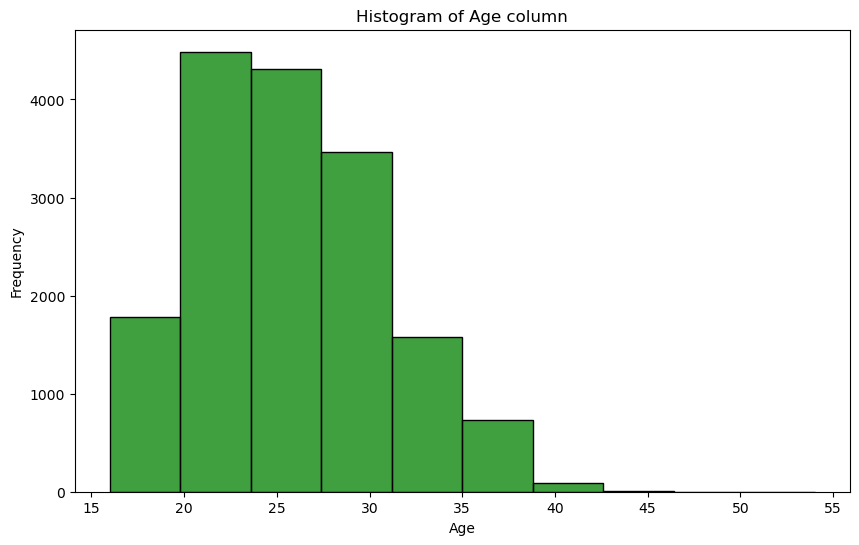

In [119]:
plt.figure(figsize=(10, 6))
sns.histplot(DATA['Age'], bins=10, kde=False, color="green")
plt.title('Histogram of Age column')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

The histogram shows a large concentration of individuals between the ages of 20 and 30, indicating that this age group forms the majority of the players.
There is a sharp decline in frequency after the age of 35, Investigate why the age group above 35 is underrepresented. This could be due to the rules  of FIFA Football, or external factors like a football player is affected by aging and is unable to run, push and push as hard as he did at the beginning of his career.

# Research Question 2: The relationship between Ball Control and Skill Move


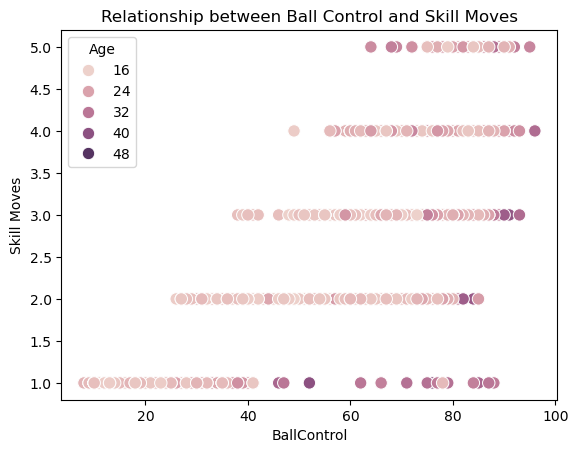

In [120]:
sns.scatterplot(x='BallControl', y='Skill Moves', hue = 'Age', data=DATA, color='black', s=80)
plt.title('Relationship between Ball Control and Skill Moves') 
plt.show()

The scatter plot shows the relationship between Ball Control and Skill Move, its a positive relationship players with higher skill moves have better ball control.

# Research Question 3: How the distributions of Skill Movements and Strength are varied among the players

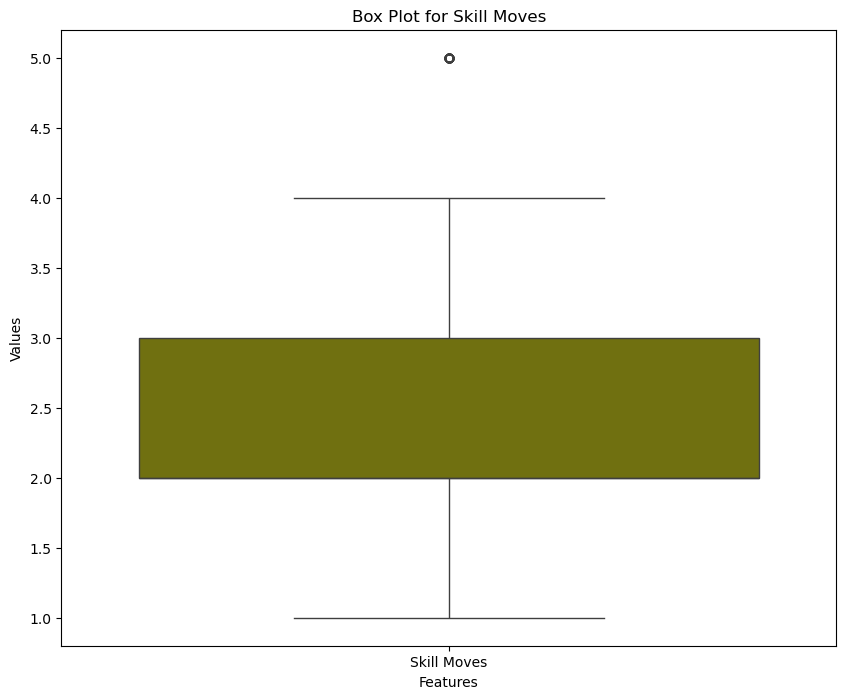

In [121]:
# plt.figure(figsize=(14,6))
# plt.subplot(1, 2, 1) 
# sns.boxplot(data=DATA[['Skill Moves']],color="olive") 
# plt.title('Box Plot for Skill Moves')
# plt.xlabel('Features')
# plt.ylabel('Values')
# plt.show()

plt.figure(figsize=(10, 8))
sns.boxplot(data=DATA[['Skill Moves']], color="olive")
plt.title('Box Plot for Skill Moves')
plt.xlabel('Features')
plt.ylabel('Values')
plt.show()


Skill Moves:Range: Values are between 1 and 4
Median: Approximately 3, indicating most players have average skill levels.
Outliers: One high outlier (above 4.5).
Distribution: The data is concentrated around 2.5 to 3.5

# Research Question 4: Distribution of Best Overall Rating

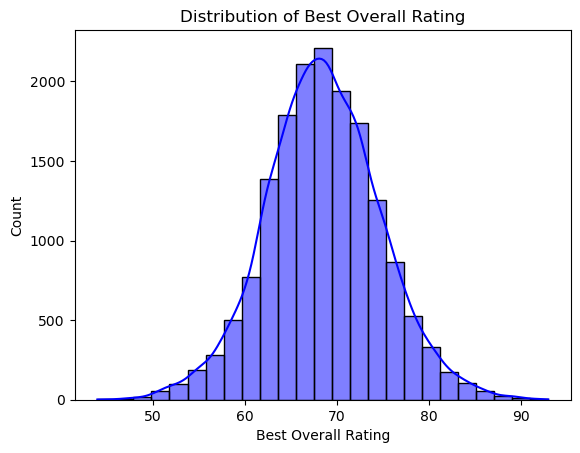

In [122]:
sns.histplot(DATA['Best Overall Rating'], kde=True, color='blue', bins=25)
plt.title('Distribution of Best Overall Rating')
plt.show()

The distribution of "Best Overall Rating" appears to be approximately normal. This means that most of the ratings are concentrated around the central value, with fewer ratings at the extremes (very low or very high). the distribution suggests that the most common "Best Overall Rating" is around 65-75. This could be considered the average rating.It appears to be slightly skewed to the right, This means that there are a few ratings that are much higher than the majority of ratings.

# Research Question 5: Ratio between players who prefer their right foot and who prefer their left foot

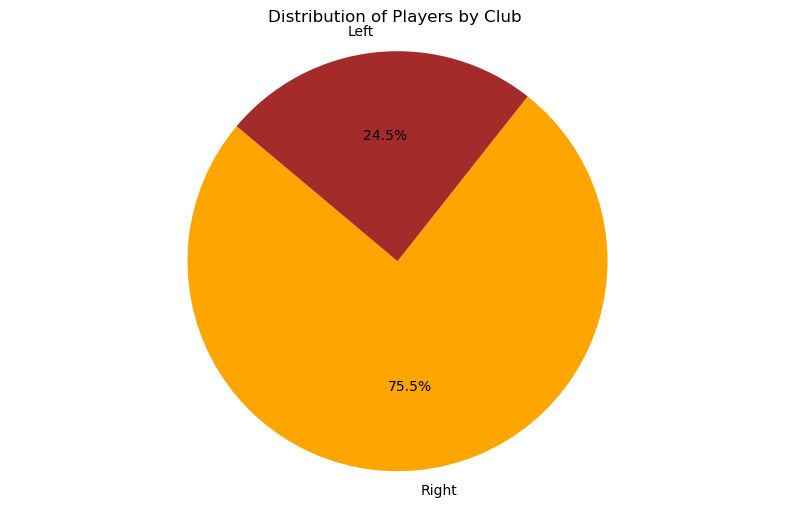

In [123]:
club_counts = DATA['Preferred Foot'].value_counts()
colors = ["orange","brown"]
plt.figure(figsize=(10, 6))
plt.pie(club_counts, labels=club_counts.index, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Players by Club ')
plt.axis('equal') 
plt.show() 

The larger blue slice represents players who prefer their right foot, indicating that they constitute a significantly larger proportion of the dataset. Quantitatively, it reveals that approximately 75.5% of players prefer their right foot, while the remaining 24.5% prefer their left foot.

# Research Question 6: The distribution of work rates among the players in the dataset

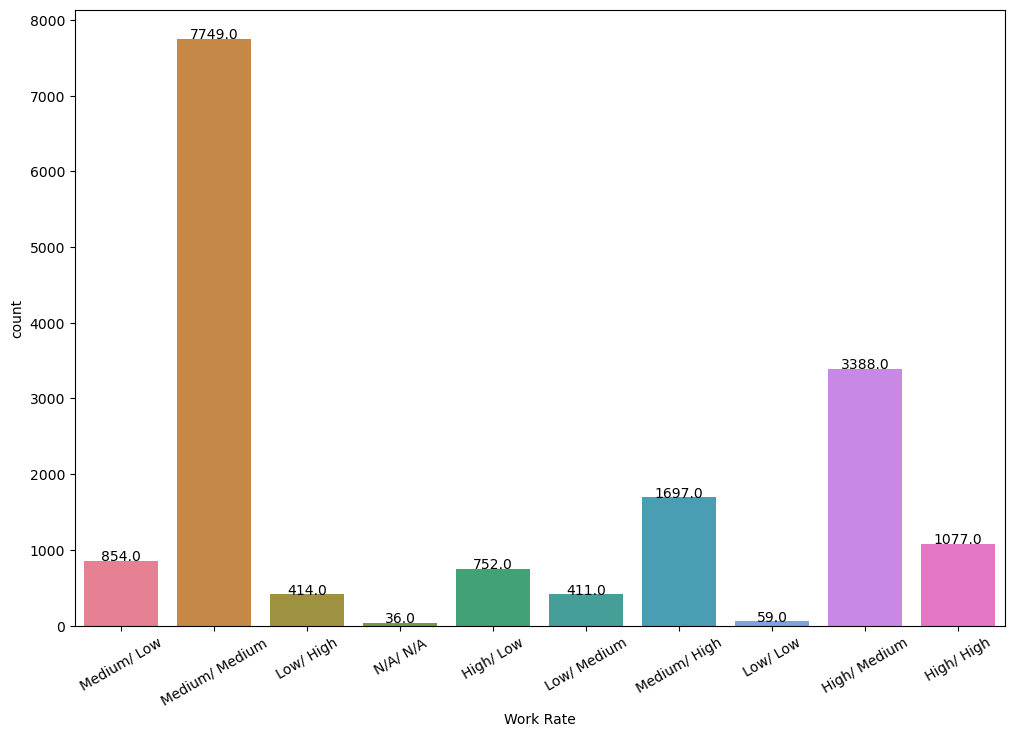

In [124]:
fig, ax = plt.subplots(figsize=(12,8))
graph = sns.countplot(ax=ax, x='Work Rate', data=DATA, hue='Work Rate', palette='husl')
graph.set_xticks(range(len(graph.get_xticklabels())))
graph.set_xticklabels(graph.get_xticklabels(), rotation=30)
for p in graph.patches:
    height = p.get_height()
    graph.text(p.get_x()+p.get_width()/2., height + 0.1,height ,ha="center")
plt.show()

Most players aim for balance, as reflected in the dominance of Medium/Medium work rates. This could suggest that versatility and adaptability are valued attributes.
A significant portion of players (High/Medium, Medium/High) emphasize either attacking or defending while maintaining balance in the other.
Categories like "Low/Low" and "N/A" indicate players who may lack significant activity, which could represent specialized roles or less active players.


# Research Question 7: Correlation between Skill Moves, ShortPassing, BallControl, and ShotPower

              Skill Moves  ShortPassing  BallControl  ShotPower
Skill Moves      1.000000      0.671999     0.760647   0.559535
ShortPassing     0.671999      1.000000     0.918329   0.578694
BallControl      0.760647      0.918329     1.000000   0.621141
ShotPower        0.559535      0.578694     0.621141   1.000000


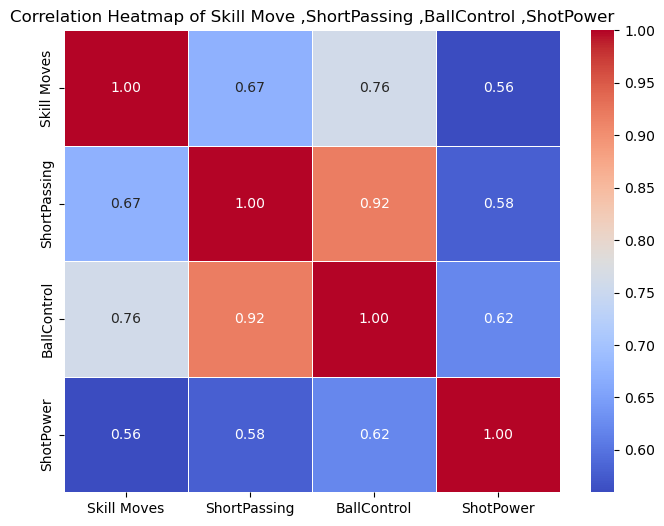

In [125]:
selected_data = DATA[['Skill Moves', 'ShortPassing', 'BallControl', 'ShotPower']]

correlation_matrix = selected_data.corr()

print(correlation_matrix)

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt=".2f", annot_kws={"size": 10, "ha": 'center', "va": 'center'})
plt.title('Correlation Heatmap of Skill Move ,ShortPassing ,BallControl ,ShotPower')
plt.show()


correlation between ShortPassing and BallControl is (0.92) very strong positive relationship. 
correlation between Skill Moves and BallControl is (0.76) strong positive relationship. 
correlation between Skill Moves and ShortPassing is (0.67)  moderate positive relationship. 
correlation between ShotPower and BallControl is (0.62) moderate positive relationship. 
correlation between Skill Moves and ShotPower is (0.56) low positive relationship. 
correlation between ShortPassing and ShotPower is (0.58)low positive relationship.

# Pairwise Relationships in the Dataset

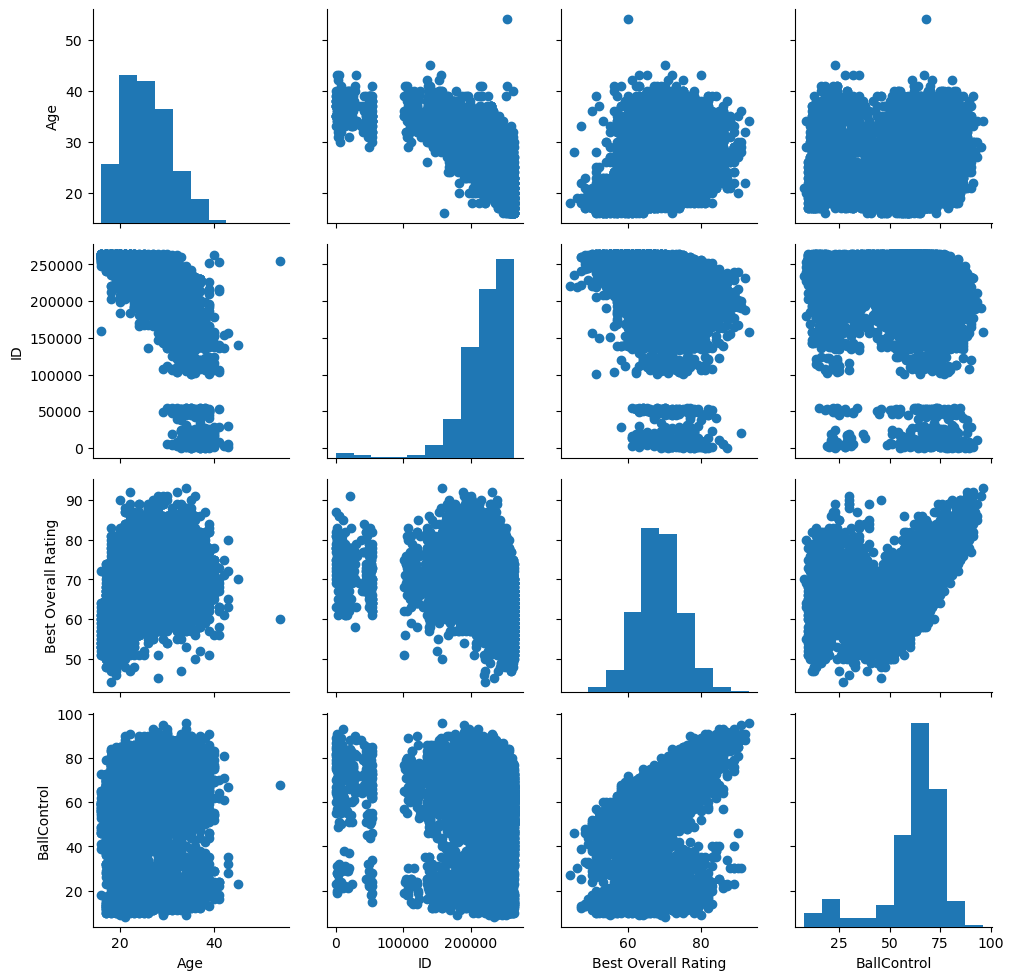

In [126]:
data= DATA [["Age","ID","Best Overall Rating","BallControl"]]
g = sns.PairGrid(data)
g = g.map_diag(plt.hist)
g = g.map_offdiag(plt.scatter)

# Machine Learning algorithm

This project uses a dataset of football players to predict their Skill Moves rating using a machine learning model.

The data includes various player attributes (e.g., position, age, club, etc.).

Categorical data (like club names or positions) is encoded into numbers.

Missing values are filled using column averages.

The data is split into training and testing sets and scaled for better accuracy.

A Logistic Regression model is trained to predict the number of Skill Moves a player has.

Model performance is evaluated using accuracy, precision, recall, and F1 score.

Finally, a histogram shows the distribution of the predicted skill move classes.

Accuracy is:  0.7759529602595296
Precision is:  0.7762095305583714
Recall is:  0.7759529602595296
F1 score is:  0.7706284945069162


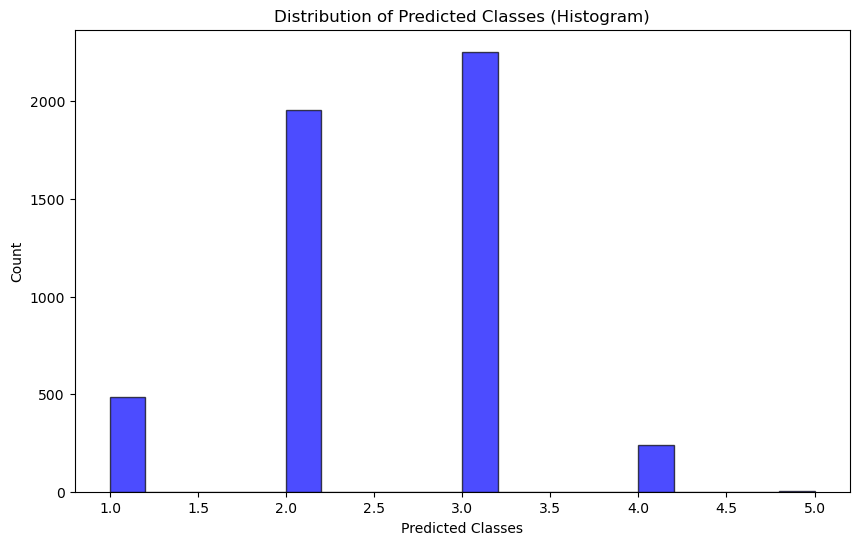

In [127]:
data = pd.read_csv(r'J:\Data science\Cleaned_DATA.csv', encoding='ISO-8859-1')

data_input = data.drop(columns=['Skill Moves'])  
data_output = data['Skill Moves']  

# convert strint to integer using LabelEncoder
label_encoders = {}
for column in data_input.select_dtypes(include=['object']).columns:
    label_encoders[column] = LabelEncoder()
    data_input[column] = label_encoders[column].fit_transform(data_input[column])


imputer = SimpleImputer(strategy='mean')
data_input = imputer.fit_transform(data_input)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    data_input, data_output, test_size=0.30, random_state=0)

# Scale the data using StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train the model Logistic Regression
model = LogisticRegression(solver='saga', max_iter=500)
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
print("Accuracy is: ", accuracy_score(y_test, y_pred))
print("Precision is: ", precision_score(y_test, y_pred, average='weighted', zero_division=0))
print("Recall is: ", recall_score(y_test, y_pred, average='weighted', zero_division=0))
print("F1 score is: ", f1_score(y_test, y_pred, average='weighted', zero_division=0))

# Histogram for the distribution of predicted values
plt.figure(figsize=(10, 6))
plt.hist(y_pred, bins=20, color='blue', edgecolor='black', alpha=0.7)
plt.title("Distribution of Predicted Classes (Histogram)")
plt.xlabel("Predicted Classes")
plt.ylabel("Count")
plt.show()

<h1 style="font-size:36px;">📌Initialize SQLite Database File </h1>


<p style="font-size:18px;"> This function initializes a SQLite
database named 'plyers.db'.

 It establishes a connection to the
database, which will be used later to sto
cleaned player data.

 No tables are created here - the
connection ensures that the
database file exists.</p>

In [ ]:
def create_database():
conn = sqlite3.connect('plyers.db')
cursor = conn.cursor()
conn.commit()
conn.close()

<h1 style="font-size:36px;">📌 Load Cleaned Data into SQLite Database</h1>

<p style="font-size:18px;"> This function reads cleaned player data
from 'cleaned_data.csv' and stores it into
the SQLite database 'plyers.db'.

It writes the data into a table named
'players_data', replacing the table if it
already exists.

 After inserting the data, it fetches and
prints the first 5 rows to
confirm the operation.</p>

In [ ]:
def load_and_store_data():
DATA = pd.read_csv("/usr/local/airflow/
include/cleaned_data.csv")
conn = sqlite3.connect('plyers.db')
DATA.to_sql('players_data', conn,
if_exists='replace', index=False)
df_check = pd.read_sql('SELECT * FROM
players_data', conn)
print(df_check.head())
conn.close()

<h1 style="font-size:36px;">📌 Set Default Arguments for the DAG</h1>

<p style="font-size:18px;">This dictionary defines the default arguments for the Airflow DAG.

 It sets the DAG owner, the number of retries if a task fails, and the start date of the DAG.</p>

In [ ]:
default_args = {
    'owner': 'airflow',
    'retries': 1,
    'start_date': datetime(2025, 5, 10),
}

<h1 style="font-size:36px;">📌 Define the Airflow DAG Configuration</h1>

<p style="font-size:18px;">This DAG defines the pipeline for loading, cleaning, visualizing, modeling,
and storing football player data.

 It runs daily according to the specified schedule and does not perform
 backfilling for previous execution dates (catchup=False).</p>

In [ ]:
dag = DAG(
'Data_Pipeline',
default_args=default_args,
description='A data pipeline DAG for
data processing, visualization, ML, and
database loading',
schedule="@daily",
catchup=False,

)

<h1 style="font-size:36px;">📌 Define Airflow Tasks Using PythonOperator</h1>

<p style="font-size:18px;">Each task below is a PythonOperator that links to a specific function for the data pipeline.

 These include tasks for creating the database, loading raw data, cleaning data, visualizing data,
 
 applying a machine learning model, and storing the final results into the database.</p>

In [ ]:
create_database_task = PythonOperator(
    task_id='create_database',
    python_callable=create_database,
    dag=dag,
)

load_data_task = PythonOperator(
    task_id='load_data',
    python_callable=load_data,
    dag=dag,
)

clean_data_task = PythonOperator(
    task_id='clean_data',
    python_callable=clean_data,
    dag=dag,
)

visualize_data_task = PythonOperator(
    task_id='visualize_data',
    python_callable=Visualize_data,
    dag=dag,
)



ml_pipeline_task = PythonOperator(
    task_id='ml_pipeline',
    python_callable=apply_ml_model,
    dag=dag,
)

store_data_task = PythonOperator(
    task_id='store_data_in_sqlite',
    python_callable=load_and_store_data,
    dag=dag,
)

<h1 style="font-size:36px;">📌 Define Task Dependencies and Execution Order in the DAG

<p style="font-size:18px;">Task dependencies define the execution order of the pipeline.
 
 Data is first loaded and cleaned.

 After cleaning, data is visualized.

Then, both the ML model is applied and the database is created in parallel.

 Finally, the cleaned and processed data is stored in the SQLite database.</p>

In [ ]:
load_data_task >> clean_data_task >> visualize_data_task  >> [ml_pipeline_task , create_database_task ] >> store_data_task